# Using Clustering to build mood based playlists

In [1]:
# Required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

### Collecting data
 See https://colab.research.google.com/drive/1-c-F9BTy2W2PkuArX0S4Rbp_kNhwB8rI#scrollTo=zI_yPGEItOYD for notebook on importing and collecting data

In [2]:
# Import and merge data (Each call can only take 2000 songs so merge last 5 years)
tmp1 = pd.read_csv('data/spotify_data_2020.csv')
tmp2 = pd.read_csv('data/spotify_data_2019.csv')
tmp3 = pd.read_csv('data/spotify_data_2018.csv')
tmp4 = pd.read_csv('data/spotify_data_2017.csv')
tmp5 = pd.read_csv('data/spotify_data_2016.csv')

frames = [tmp1,tmp2,tmp3,tmp4,tmp5]

df = pd.concat(frames).drop_duplicates().reset_index(drop=True) 
df = df.drop(columns=['Unnamed: 0'])
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.700,0.722,7,-3.558,0,0.0369,0.221,0.0,0.2720,0.756,90.989,140526,4
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.830,0.585,0,-6.476,1,0.0940,0.237,0.0,0.2480,0.485,109.978,173711,4
2,Ariana Grande,positions,35mvY5S1H3J2QZyna3TFe0,99,0.737,0.802,0,-4.771,1,0.0878,0.468,0.0,0.0931,0.682,144.015,172325,4
3,CJ,Whoopty,5vGLcdRuSbUhD8ScwsGSdA,96,0.711,0.598,3,-7.621,0,0.1820,0.190,0.0,0.1500,0.737,140.175,123429,4
4,The Kid LAROI,WITHOUT YOU,27OeeYzk6klgBh83TSvGMA,96,0.662,0.413,0,-7.357,1,0.0299,0.213,0.0,0.1340,0.467,93.005,161385,4


In [3]:
# shape of the dataset
print("Data Frame Dimensions:")
print("Lines:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

# Verify no missing data
print(df.info())

Data Frame Dimensions:
Lines:		9702
Columns:	17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9702 entries, 0 to 9701
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       9702 non-null   object 
 1   track_name        9702 non-null   object 
 2   track_id          9702 non-null   object 
 3   popularity        9702 non-null   int64  
 4   danceability      9702 non-null   float64
 5   energy            9702 non-null   float64
 6   key               9702 non-null   int64  
 7   loudness          9702 non-null   float64
 8   mode              9702 non-null   int64  
 9   speechiness       9702 non-null   float64
 10  acousticness      9702 non-null   float64
 11  instrumentalness  9702 non-null   float64
 12  liveness          9702 non-null   float64
 13  valence           9702 non-null   float64
 14  tempo             9702 non-null   float64
 15  duration_ms       9702 non-null   int64  

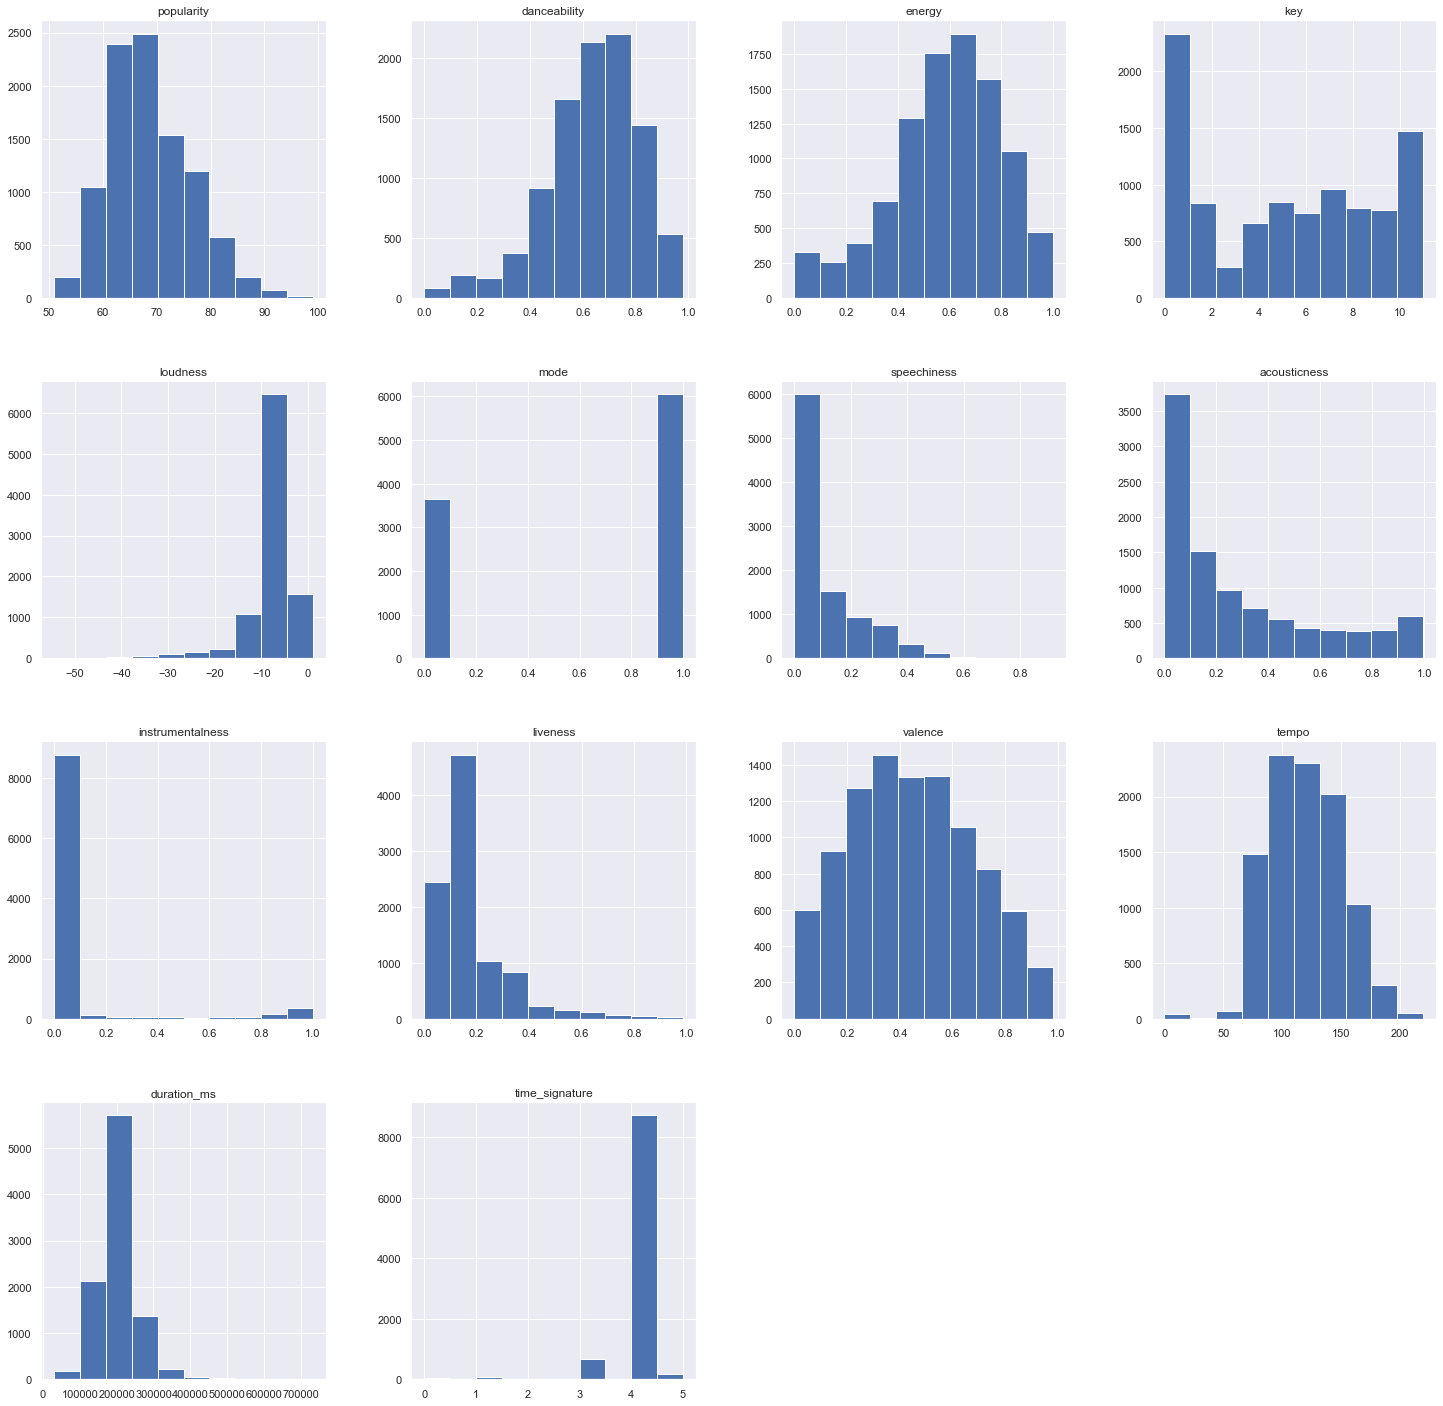

In [4]:
# Take a look at how the data is
df.hist(figsize=(25,25));

In [16]:
# statistical distribution of categorical values
df.describe(include="O")

,artist_name,track_name,track_id
count,9702,9702,9702
unique,2885,9046,9702
top,BTS,Alone,56dDonzTxrZKWuVDqUOYGd
freq,96,10,1


BTS Most common artist in the dataframe

In [5]:
# checking most recurrent artists in Brazil
n = 10
print("Most Popular Artists")
df['artist_name'].value_counts()[:n]

Most Popular Artists


BTS                           96
Drake                         78
Bad Bunny                     70
Taylor Swift                  68
Juice WRLD                    67
Lil Uzi Vert                  63
YoungBoy Never Broke Again    62
Future                        61
Ariana Grande                 60
Playboi Carti                 58
Name: artist_name, dtype: int64

## Building a correlation matrix to take a look at the data

Predictive correlation between different variables

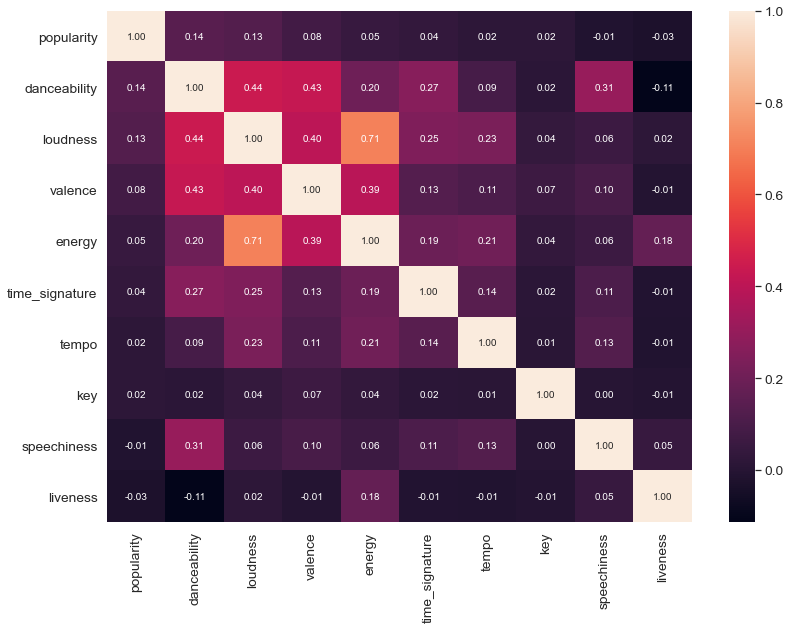

In [9]:
# creating a correlation matrix
corr = df.corr()

# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()


# TODO: Investigate data from here

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=df_top['popularity'], y=df_top['acousticness'], ax=ax1);
sns.regplot(x=df_top['popularity'], y=df_top['instrumentalness'], ax=ax2);
plt.tight_layout()

In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [12]:
# creating a copy of the dataset
df_cluster = df.copy()
df_cluster = df_cluster.iloc[:300]

In [13]:
df_cluster.to_csv('df_thing.csv', index=0)

In [14]:
# creating a dataframe without the categorical features
X = pd.DataFrame(df_cluster.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values)

In [15]:
cols = df_cluster.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].columns
X.columns = cols

In [16]:
X.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,99.0,0.700,0.722,7.0,-3.558,0.0,0.0369,0.221,0.0,0.2720,0.756,90.989,140526.0,4.0
1,97.0,0.830,0.585,0.0,-6.476,1.0,0.0940,0.237,0.0,0.2480,0.485,109.978,173711.0,4.0
2,99.0,0.737,0.802,0.0,-4.771,1.0,0.0878,0.468,0.0,0.0931,0.682,144.015,172325.0,4.0
3,96.0,0.711,0.598,3.0,-7.621,0.0,0.1820,0.190,0.0,0.1500,0.737,140.175,123429.0,4.0
4,96.0,0.662,0.413,0.0,-7.357,1.0,0.0299,0.213,0.0,0.1340,0.467,93.005,161385.0,4.0


In [18]:
print(X.shape)
df_cluster.head()

(300, 14)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.700,0.722,7,-3.558,0,0.0369,0.221,0.0,0.2720,0.756,90.989,140526,4
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.830,0.585,0,-6.476,1,0.0940,0.237,0.0,0.2480,0.485,109.978,173711,4
2,Ariana Grande,positions,35mvY5S1H3J2QZyna3TFe0,99,0.737,0.802,0,-4.771,1,0.0878,0.468,0.0,0.0931,0.682,144.015,172325,4
3,CJ,Whoopty,5vGLcdRuSbUhD8ScwsGSdA,96,0.711,0.598,3,-7.621,0,0.1820,0.190,0.0,0.1500,0.737,140.175,123429,4
4,The Kid LAROI,WITHOUT YOU,27OeeYzk6klgBh83TSvGMA,96,0.662,0.413,0,-7.357,1,0.0299,0.213,0.0,0.1340,0.467,93.005,161385,4


In [20]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = cols

In [23]:
scaled.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.000000,0.589443,0.697009,0.636364,0.902763,0.0,0.025705,0.235688,0.0,0.349024,0.788616,0.208191,0.256002,0.75
1,0.913043,0.780059,0.518856,0.000000,0.714360,1.0,0.136065,0.252767,0.0,0.313273,0.490257,0.341398,0.367972,0.75
2,1.000000,0.643695,0.801040,0.000000,0.824445,1.0,0.124082,0.499354,0.0,0.082526,0.707145,0.580167,0.363296,0.75
3,0.869565,0.605572,0.535761,0.272727,0.640431,0.0,0.306146,0.202596,0.0,0.167287,0.767698,0.553230,0.198314,0.75
4,0.869565,0.533724,0.295189,0.000000,0.657477,1.0,0.012176,0.227148,0.0,0.143453,0.470439,0.222333,0.326383,0.75


In [24]:
scaled= scaler.fit_transform(X)

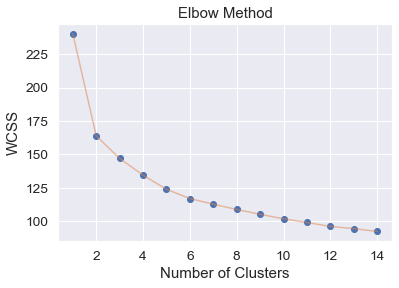

In [25]:
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [26]:
# instantiating model
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

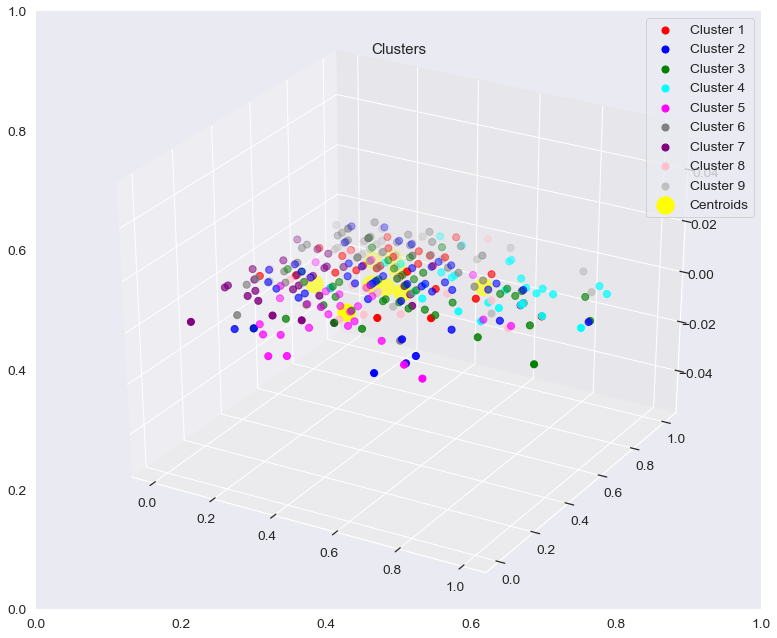

In [27]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(scaled[y_kmeans == 6,0], scaled[y_kmeans == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(scaled[y_kmeans == 7,0], scaled[y_kmeans == 7,1], s= 50, c= 'pink', label= 'Cluster 8')
plt.scatter(scaled[y_kmeans == 8,0], scaled[y_kmeans == 8,1], s= 50, c= 'silver', label= 'Cluster 9')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [28]:
# predictions 
y_kmeans

array([3, 2, 2, 3, 2, 1, 2, 3, 3, 0, 8, 2, 3, 1, 3, 3, 0, 4, 4, 1, 3, 4,
       2, 7, 1, 2, 3, 3, 4, 1, 5, 5, 2, 1, 1, 8, 8, 1, 8, 1, 4, 1, 0, 1,
       8, 5, 2, 7, 0, 5, 3, 2, 5, 1, 6, 8, 3, 4, 7, 2, 3, 2, 2, 6, 4, 1,
       2, 8, 2, 3, 7, 6, 5, 3, 4, 6, 2, 5, 5, 8, 8, 7, 0, 1, 8, 4, 5, 5,
       2, 3, 3, 6, 2, 2, 1, 2, 4, 0, 1, 4, 6, 4, 2, 5, 3, 5, 0, 6, 1, 6,
       2, 5, 7, 0, 4, 1, 0, 6, 1, 2, 1, 7, 8, 4, 1, 0, 2, 3, 7, 3, 7, 2,
       1, 1, 5, 2, 4, 4, 4, 1, 4, 2, 7, 7, 5, 7, 6, 3, 1, 5, 2, 8, 4, 0,
       7, 0, 8, 4, 0, 8, 2, 8, 5, 8, 4, 6, 5, 2, 6, 2, 8, 8, 7, 6, 0, 3,
       8, 5, 4, 6, 8, 5, 0, 5, 2, 5, 5, 3, 5, 6, 1, 0, 4, 8, 3, 7, 1, 8,
       0, 7, 2, 8, 1, 4, 1, 1, 5, 5, 2, 4, 8, 1, 8, 8, 1, 1, 7, 8, 0, 6,
       0, 3, 1, 5, 2, 2, 6, 6, 0, 1, 8, 3, 6, 8, 8, 8, 0, 1, 5, 1, 6, 6,
       4, 1, 5, 3, 0, 0, 5, 1, 0, 5, 2, 4, 0, 2, 2, 0, 5, 5, 5, 5, 5, 1,
       0, 1, 1, 0, 4, 7, 6, 2, 8, 7, 2, 6, 2, 3, 6, 1, 2, 5, 4, 6, 6, 5,
       1, 6, 6, 0, 7, 6, 8, 8, 5, 5, 0, 6, 3, 3])

In [29]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans.head()

(300, 1)


,k_cluster
0,3
1,2
2,2
3,3
4,2


In [30]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_cluster, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(300, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.700,0.722,7,-3.558,0,0.0369,0.221,0.0,0.2720,0.756,90.989,140526,4,3
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.830,0.585,0,-6.476,1,0.0940,0.237,0.0,0.2480,0.485,109.978,173711,4,2
2,Ariana Grande,positions,35mvY5S1H3J2QZyna3TFe0,99,0.737,0.802,0,-4.771,1,0.0878,0.468,0.0,0.0931,0.682,144.015,172325,4,2
3,CJ,Whoopty,5vGLcdRuSbUhD8ScwsGSdA,96,0.711,0.598,3,-7.621,0,0.1820,0.190,0.0,0.1500,0.737,140.175,123429,4,3
4,The Kid LAROI,WITHOUT YOU,27OeeYzk6klgBh83TSvGMA,96,0.662,0.413,0,-7.357,1,0.0299,0.213,0.0,0.1340,0.467,93.005,161385,4,2


In [31]:
# popularity mean by cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
3    90.500000
2    86.441860
1    85.045455
4    84.862069
0    84.433333
7    84.000000
8    83.147059
5    82.150000
6    80.766667
Name: popularity, dtype: float64

In [32]:
# checking number of songs in each cluster
df_cluster['k_cluster'].value_counts()

1    44
2    43
5    40
8    34
6    30
3    30
0    30
4    29
7    20
Name: k_cluster, dtype: int64

In [38]:
# checking the songs in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 7][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
23,Justin Bieber,Lonely (with benny blanco),4y4spB9m0Q6026KfkAvy9Q,95,0.631,0.239,11,-7.071,0,0.0398,0.864,0.00000,0.1160,0.0927,79.859,149297,4,7
47,Powfu,death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,92,0.726,0.431,8,-8.765,0,0.1350,0.731,0.00000,0.6960,0.3480,144.026,173333,4,7
58,Brent Faiyaz,Dead Man Walking,5VlTQnZO89Ioku8ssdbqJk,85,0.505,0.267,9,-13.763,0,0.0500,0.279,0.00000,0.0960,0.4390,143.929,247080,4,7
70,Taylor Swift,"no body, no crime (feat. HAIM)",3RaT22zZsxVYxxKR7TAaYF,86,0.546,0.613,7,-7.589,0,0.0264,0.418,0.00000,0.1030,0.5350,79.015,215627,4,7
81,Noah Cyrus,July,6J2LdBN97cDWn0MLxYh9HB,87,0.708,0.186,9,-8.953,0,0.0420,0.868,0.00000,0.0779,0.3220,72.541,156106,4,7
112,Morgan Wallen,Livin’ The Dream,2L4YgbxxwmwafMqLIjSx8q,80,0.621,0.754,7,-5.904,0,0.0269,0.575,0.00484,0.2130,0.4410,127.036,239120,4,7
121,Fousheé,Deep End,6HlE9t71z9DjGi7KqSyEpA,89,0.711,0.592,4,-7.136,0,0.2300,0.758,0.00000,0.1560,0.5350,124.749,141224,4,7
128,YNW Melly,Suicidal (Remix) [feat. Juice WRLD],4S2uhQE8L9V6p7rj7SiauJ,83,0.655,0.441,9,-5.245,0,0.0629,0.474,0.00000,0.0990,0.2730,139.957,225857,4,7
130,347aidan,Dancing in My Room,6Pgmqg15yVexuOgtzuxwoX,87,0.980,0.413,8,-11.052,0,0.1010,0.671,0.00008,0.1700,0.7640,119.993,180139,4,7
142,StaySolidRocky,Party Girl,5RqR4ZCCKJDcBLIn4sih9l,85,0.728,0.431,6,-9.966,0,0.0622,0.749,0.00000,0.0996,0.6290,130.022,147800,4,7
